---------
# Aviakompaniya
-------------
Aviakompaniya yo'lovchilarining qoniqishi

```Tarkib```:

`Gender`: yo'lovchilarning jinsi (ayol, erkak)

`Customer Type`: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

`Age`: yo'lovchilarning haqiqiy yoshi

`Type of Travel`: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

`Class`: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

`Flight distance`: Ushbu sayohatning parvoz masofasi

`Inflight wifi service`: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

`Departure/Arrival time convenient`: Ketish/Kelish vaqtining qoniqish darajasi

`Ease of Online booking`: Onlayn bron qilishdan qoniqish darajasi

`Gate location`: Darvoza joylashuvidan qoniqish darajasi

`Food and drink`: Oziq-ovqat va ichimlikdan qoniqish darajasi

`Online boarding`: Onlayn bortdan qoniqish darajasi

`Seat comfort`: O'rindiqning qulayligidan qoniqish darajasi

`Inflight entertainment`: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

`On-board service`: Bort xizmatidan qoniqish darajasi

`Leg room service`: oyoq xonasi xizmatidan qoniqish darajasi

`Baggage handling`: bagajni tashishdan qoniqish darajasi

`Check-in service`: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

`Inflight service`: Parvoz ichidagi xizmatdan qoniqish darajasi

`Cleanliness`: Tozalikdan qoniqish darajasi

`Departure Delay in Minutes`: jo‘nash vaqtida kechikish daqiqalari

`Arrival Delay in Minutes`: yetib kelganda kechikish daqiqalari

`Satisfaction`: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

Kerakli kutubxonalarni yuklab olamiz

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [109]:
df1 = pd.read_csv("/content/sample_submission.csv")

In [128]:
train_set = pd.read_csv("/content/train_dataset.csv")

In [129]:
test_set = pd.read_csv("/content/test_dataset.csv")

In [130]:
df1

,id,satisfaction
0,1,0
1,2,0
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,0
3996,3997,0
3997,3998,0
3998,3999,0


In [131]:
train_set.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [132]:
test_set.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


train_set jadvalida `satisfaction` ustuni ichidagi qiymatlar nisbatini  ko'ramiz

In [133]:
train_set['satisfaction'].value_counts()/len(train_set)*100

0    50.0
1    50.0
Name: satisfaction, dtype: float64

shu `satisfaction` ustunni boshqa ustunlar bilan bog'liqligini ko'ramiz

In [134]:
train_set.corrwith(train_set['satisfaction']).abs().sort_values(ascending=False)

<ipython-input-134-75327d4422fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corrwith(train_set['satisfaction']).abs().sort_values(ascending=False)


satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
id                                   0.002931
dtype: float64

`train_set` jadvalini matnlarni sonlar ko'rinishiga o'ktazamiz

In [135]:
train_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

train_set[train_columns] = train_set[train_columns].replace({"Male":1, "Female":0,
                                                             "Loyal Customer":1, "disloyal Customer":0,
                                                             "Personal Travel":1, "Business travel":0,
                                                             "Eco":0, "Eco Plus":1, "Business":2})

`NaN` qiymatlarni 0 bilan to'ldiramiz

In [136]:
train_set['Arrival Delay in Minutes'] = train_set['Arrival Delay in Minutes'].fillna(0)

------------

ML ga tayyorgarlik
-----------------

train_set jadvalimizni ikki qismga bo'lib olamiz

In [137]:
X = train_set.drop(["satisfaction", "id"], axis=1)
Y = train_set['satisfaction']

`satisfaction` ustuni yo'q bo'lgan jadvalimizni standartlashtirib olamiz

In [138]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Endi X va Y jadvallarini qismlarga bo'lib modelimizni o'qitib test qilishimiz ham mumkin

In [139]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

Machine Learning
--------

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1000
           1       0.95      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model aniqligi: 0.9485


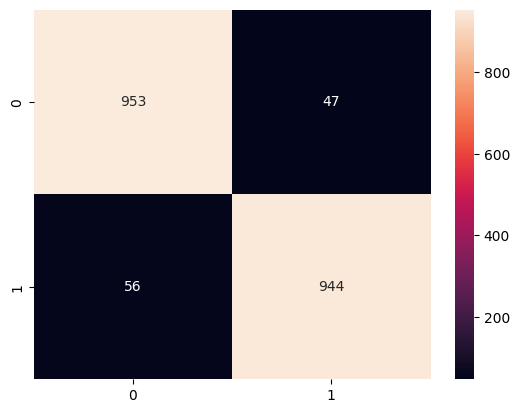

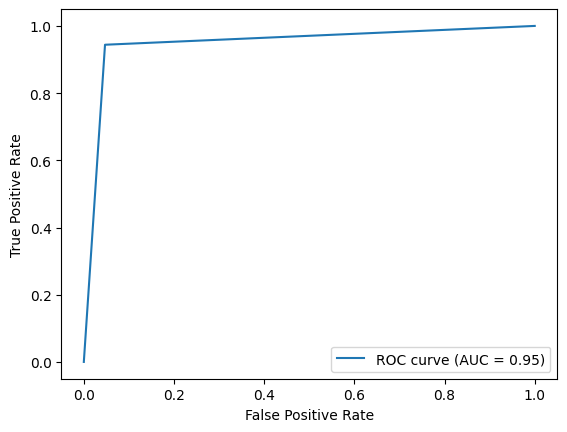

In [140]:
# Modelni yaratamiz (training)
XGB_model = XGBClassifier()
XGB_model.fit(X_train, Y_train)

# Modelni baholaymiz
Y_pred = XGB_model.predict(X_test)
print(metrics.classification_report(Y_test, Y_pred))
print("Model aniqligi:", metrics.accuracy_score(Y_test,Y_pred))

# confusion matrix - matritsa ko'rinishida xatolikni ko'rish
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve - grafik ko'rinishida xatolikni ko'rish
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

---------
Test_set
----------

Endigi navbat `test_set` jadvalimizga.

uni qiymatlarini matndan songa o'tkazib olamiz

In [141]:
test_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

test_set[train_columns] = test_set[train_columns].replace({"Male":1, "Female":0,
                                                             "Loyal Customer":1, "disloyal Customer":0,
                                                             "Personal Travel":1, "Business travel":0,
                                                             "Eco":0, "Eco Plus":1, "Business":2})

In [142]:
test_set['Arrival Delay in Minutes'] = test_set['Arrival Delay in Minutes'].fillna(0)

In [143]:
# X ni tayyorlash
X1_test = test_set.copy()

Bizga `X1_test` jadvalimizda `id` ustuni kerak emas

In [144]:
X1_test = X1_test.drop("id", axis=1)

In [145]:
# Test datasetni ham standartlashtirish
X1_test = scaler.transform(X1_test)

In [146]:
# Test datani ishlatib 'satisfaction' ustunini bashorat qilish
Y_test_pred = XGB_model.predict(X1_test)

bashorat qilingan qiymatlarni jadval ko'rinishiga keltirib olamiz

In [147]:
Y_test_pred = pd.DataFrame(Y_test_pred)

bashorat qilinishi kerak bo'lgan qiymat

In [148]:
Y_test_pred

,0
0,0
1,1
2,1
3,1
4,1
...,...
3995,1
3996,0
3997,0
3998,1


In [151]:
# Ustunni boshqa jadvalga o'tkazamiz
df1['satisfaction'] = Y_test_pred[0].copy()

In [152]:
df1.to_csv('Aviakompaniya(4).csv',index=False)